Causal learning
In causal learning we split our data into training and hold-out set then we create the causal graph. 


In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sys, os

In [9]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
# from plot import Plots as plot
import dvc.api

In [10]:
# the path to the data set
path = '../data/final_data.csv'

# base repository
repo = 'https://github.com/BirtukanK/Logistic_optimization'
version = '654fc493796d5178866a63176d45e38f02f10445'

In [13]:
data_url = dvc.api.read(path = path, repo = repo, rev = version)

In [14]:
# reading data using pandas library
from io import StringIO


df = pd.read_csv(StringIO(data_url))

In [6]:
df.columns

Index(['id', 'order_id', 'driver_id', 'driver_action', 'lat', 'lng',
       'Trip Origin', 'Trip Destination', 'Trip Start Time', 'Trip End Time',
       'Trip_Origin_lat', 'Trip_Origin_lng', 'Trip_Destination_lat',
       'Trip_Destination_lng', 'Distance', 'Distance_driver_origin'],
      dtype='object')

In [8]:
drop_col = ['id','Trip Start Time','Trip End Time','Trip_Origin_lat', 'Trip_Origin_lng','Trip_Destination_lat','Trip_Destination_lng']


In [9]:

struct_data = df.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)



['driver_action', 'Trip Origin', 'Trip Destination', 'Trip Start Time', 'Trip End Time']


Causal graphical models

This module is used for drawing causal graph based on the idea on what is the cause and the effect.

In [4]:
pip install causalgraphicalmodels

  Using cached causalgraphicalmodels-0.0.4-py3-none-any.whl (11 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
from causalgraphicalmodels import CausalGraphicalModel

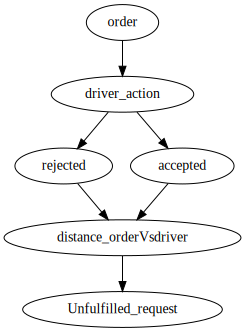

In [2]:
sprinkler = CausalGraphicalModel(
    nodes=["order", "driver_action", "accepted", "rejected", "distance_orderVsdriver", "Unfulfilled_request"],
    edges=[
        ("order", "driver_action"), 
        ("driver_action", "accepted"), 
        ("driver_action", "rejected"),
        ("accepted", "distance_orderVsdriver"), 
        ("rejected", "distance_orderVsdriver"),
        ("distance_orderVsdriver", "Unfulfilled_request")
    ]
)

# draw return a graphviz `dot` object, which jupyter can render
sprinkler.draw()

In [3]:
print(sprinkler.get_distribution())

P(order)P(driver_action|order)P(accepted|driver_action)P(rejected|driver_action)P(distance_orderVsdriver|accepted,rejected)P(Unfulfilled_request|distance_orderVsdriver)


In [4]:
# check for d-seperation of two nodes
sprinkler.is_d_separated("Unfulfilled_request", "order", {"accepted"})

False

In [5]:
# get all the conditional independence relationships implied by a CGM
sprinkler.get_all_independence_relationships()

[('rejected', 'order', {'driver_action'}),
 ('rejected', 'order', {'accepted', 'driver_action'}),
 ('rejected', 'order', {'distance_orderVsdriver', 'driver_action'}),
 ('rejected', 'order', {'Unfulfilled_request', 'driver_action'}),
 ('rejected',
  'order',
  {'accepted', 'distance_orderVsdriver', 'driver_action'}),
 ('rejected', 'order', {'Unfulfilled_request', 'accepted', 'driver_action'}),
 ('rejected',
  'order',
  {'Unfulfilled_request', 'distance_orderVsdriver', 'driver_action'}),
 ('rejected',
  'order',
  {'Unfulfilled_request',
   'accepted',
   'distance_orderVsdriver',
   'driver_action'}),
 ('rejected', 'Unfulfilled_request', {'distance_orderVsdriver'}),
 ('rejected', 'Unfulfilled_request', {'accepted', 'distance_orderVsdriver'}),
 ('rejected', 'Unfulfilled_request', {'distance_orderVsdriver', 'order'}),
 ('rejected',
  'Unfulfilled_request',
  {'distance_orderVsdriver', 'driver_action'}),
 ('rejected',
  'Unfulfilled_request',
  {'accepted', 'distance_orderVsdriver', 'orde

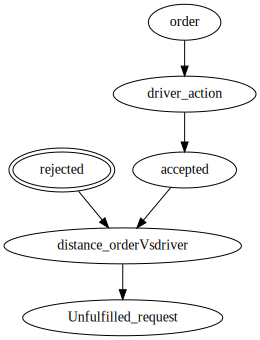

In [8]:
# get the graph created by intervening on node "rejected"
do_sprinkler = sprinkler.do("rejected")

do_sprinkler.draw()